In [1]:
from load_data import *
from simple_models import *
from causal_models import *
from utils import *
from stgat_like import *

# I. Load Data

In [2]:
non_causal_threshold = 0.001
causal_threshold = 0.1
batch_size_ = 64

file_name_ = 'synth_v1.a.filtered.pkl'

train_loader, val_loader = load_dataset(non_causal_threshold, causal_threshold, batch_size = batch_size_, file_name = file_name_)

# II. Train and test Model

## 1. Simple models

## 1.1 MLP

### Train

In [14]:
time_step_per_agent = 20
hidden_layer = 32

MLP_classifier = MLP_Classifier(time_step_per_agent*2*2, hidden_layer)

In [19]:
num_epochs = 20

In [20]:
# First, we need to define a loss function and an optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(MLP_classifier.parameters(), lr=0.0005)
loss_epoch = []

# Then, we can define the training loop
for epoch in range(num_epochs):
    # Loop over the training data in batches
    for inputs, inputs_agents, labels, _, _ in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = MLP_classifier(inputs, inputs_agents)
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        loss_epoch += [loss.detach()]
    if epoch % 10 == 0:
        _, _, acc, f1, _, _, _ = predict(MLP_classifier, val_loader)
        print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', Accuracy = ', acc, ', F1-score = ', f1)
        

Epoch n° 0 : loss =  0.2998187 , Accuracy =  0.872640627920015 , F1-score =  0.8721268411670888
Epoch n° 10 : loss =  0.299785 , Accuracy =  0.8724537469631845 , F1-score =  0.8718670796958604


### Test

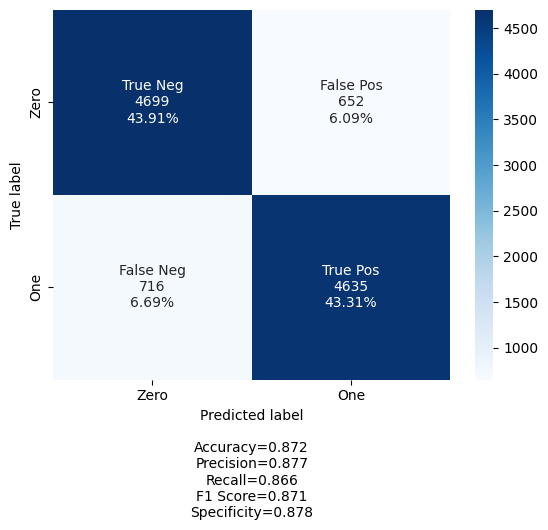

In [22]:
plot_result_matrix(MLP_classifier, val_loader)

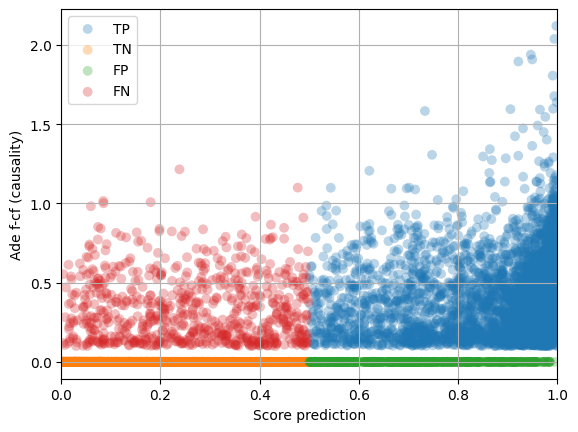

In [24]:
plot_graph_score_ade(MLP_classifier, val_loader)

### Test on 'Indirectly causal'

In [28]:
nc_threshold_ = 0.001
c_threshold_ = 0.1
orca_causal_time_steps_max_ = 0
orca_causal_time_steps_min_ = 20

test_ic_loader = load_indirectly_causal_set(orca_causal_time_steps_max = orca_causal_time_steps_max_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)
test_inc_loader = load_indirectly_non_causal_set(orca_causal_time_steps_min = orca_causal_time_steps_min_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)

In [29]:
print('Accuracy on the indirectly causal scenarios :', round(predict_ic(MLP_classifier, test_ic_loader)*100, 2), '%')



Accuracy on the indirectly causal scenarios : 56.93 %


In [30]:
print('Accuracy on the indirectly non-causal scenarios :', round(predict_ic(MLP_classifier, test_inc_loader)*100, 2), '%')



Accuracy on the indirectly non-causal scenarios : 81.41 %


## 1.2 RN

### Train

In [33]:
time_step_per_agent = 20
hidden_layer = 32

RN_classifier = RN_Classifier(time_step_per_agent*2, hidden_layer)

In [44]:
num_epochs = 40

In [45]:
# First, we need to define a loss function and an optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(RN_classifier.parameters(), lr=0.001)
loss_epoch = []

# Then, we can define the training loop
for epoch in range(num_epochs):
    # Loop over the training data in batches
    for inputs, inputs_agents, labels, _, _ in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = RN_classifier(inputs, inputs_agents)
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        loss_epoch += [loss.detach()]
    if epoch % 10 == 0:
        _, _, acc, f1, _, _, _ = predict(RN_classifier, val_loader)
        print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', Accuracy = ', acc, ', F1-score = ', f1)
        

Epoch n° 0 : loss =  0.2193069 , Accuracy =  0.8904877592973276 , F1-score =  0.8882532418001525
Epoch n° 10 : loss =  0.21937093 , Accuracy =  0.8918893664735563 , F1-score =  0.8891443901504263
Epoch n° 20 : loss =  0.21922868 , Accuracy =  0.8908615212109886 , F1-score =  0.8885921404044258
Epoch n° 30 : loss =  0.21906877 , Accuracy =  0.8908615212109886 , F1-score =  0.8885708834191948


### Test

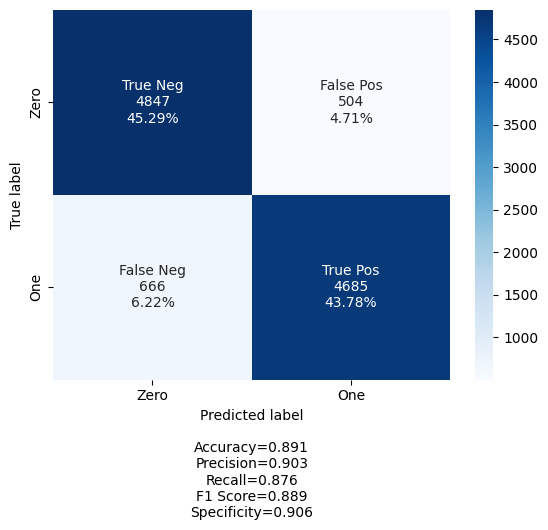

In [46]:
plot_result_matrix(RN_classifier, val_loader)

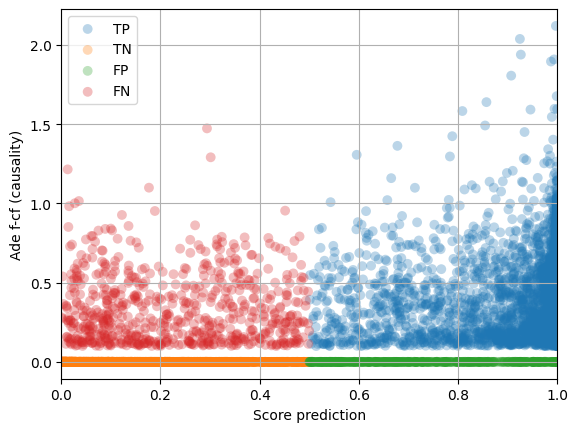

In [47]:
plot_graph_score_ade(RN_classifier, val_loader)

### Test on 'Indirectly causal'

In [48]:
nc_threshold_ = 0.001
c_threshold_ = 0.1
orca_causal_time_steps_max_ = 0
orca_causal_time_steps_min_ = 20

test_ic_loader = load_indirectly_causal_set(orca_causal_time_steps_max = orca_causal_time_steps_max_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)
test_inc_loader = load_indirectly_non_causal_set(orca_causal_time_steps_min = orca_causal_time_steps_min_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)

In [49]:
print('Accuracy on the indirectly causal scenarios :', round(predict_ic(RN_classifier, test_ic_loader)*100, 2), '%')




Accuracy on the indirectly causal scenarios : 56.93 %


In [50]:
print('Accuracy on the indirectly non-causal scenarios :', round(predict_ic(RN_classifier, test_inc_loader)*100, 2), '%')




Accuracy on the indirectly non-causal scenarios : 85.03 %


## 1.3 LSTM

### Train

In [51]:
print_every = 1

In [52]:
time_step_per_agent = 20
hidden_layer = 32

LSTM_classifier = LSTM_Classifier(time_step_per_agent*2*2, hidden_layer)

In [ ]:
training_step = 1

In [56]:
num_epochs = 10

In [57]:
# First, we need to define a loss function and an optimizer
mse_loss = nn.MSELoss()
bce_loss = nn.BCELoss()
optimizer = torch.optim.SGD(LSTM_classifier.parameters(), lr=0.001)
loss_epoch = []

# Then, we can define the training loop
for epoch in range(num_epochs):
    
    if epoch == 10:
        training_step = 2
        for g in optimizer.param_groups:
            g['lr'] = 0.001
    loss_epoch = []
    
    # Loop over the training data in batches
    for inputs, inputs_agents, labels, _, _ in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        #print(inputs.shape, inputs.type, labels.shape)
        # Forward pass
        outputs = LSTM_classifier(inputs, inputs_agents, training_step)
        if training_step == 1:
            loss = mse_loss(outputs, inputs)
        if training_step == 2:
            loss = bce_loss(outputs, labels.unsqueeze(1))

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        loss_epoch += [loss.detach()]
    if epoch % print_every == 0:
        if training_step == 1:
            loss_val = ade_val(LSTM_classifier, val_loader, training_step_ = training_step)
            print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', loss validation = ', loss_val)
        if training_step == 2:
            _, _, acc, f1, _, _, _ = predict(LSTM_classifier, val_loader)
            print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', Accuracy = ', acc, ', F1-score = ', f1)
        



Epoch n° 0 : loss =  0.28596595 , Accuracy =  0.8728275088768455 , F1-score =  0.870220272718604
Epoch n° 1 : loss =  0.28709835 , Accuracy =  0.873014389833676 , F1-score =  0.8700640596615354
Epoch n° 2 : loss =  0.28587088 , Accuracy =  0.8714259017006167 , F1-score =  0.8681739796895958
Epoch n° 3 : loss =  0.2856242 , Accuracy =  0.873761913660998 , F1-score =  0.8712720343020486
Epoch n° 4 : loss =  0.285583 , Accuracy =  0.8718931040926929 , F1-score =  0.8692667111662058
Epoch n° 5 : loss =  0.2855015 , Accuracy =  0.8725471874415996 , F1-score =  0.8696233989676926
Epoch n° 6 : loss =  0.28534606 , Accuracy =  0.8717062231358624 , F1-score =  0.8684487879658906
Epoch n° 7 : loss =  0.2855484 , Accuracy =  0.8724537469631845 , F1-score =  0.869540284813151
Epoch n° 8 : loss =  0.28497186 , Accuracy =  0.8728275088768455 , F1-score =  0.870021965428326
Epoch n° 9 : loss =  0.28490356 , Accuracy =  0.8732947112689217 , F1-score =  0.8702143950995406


### Test

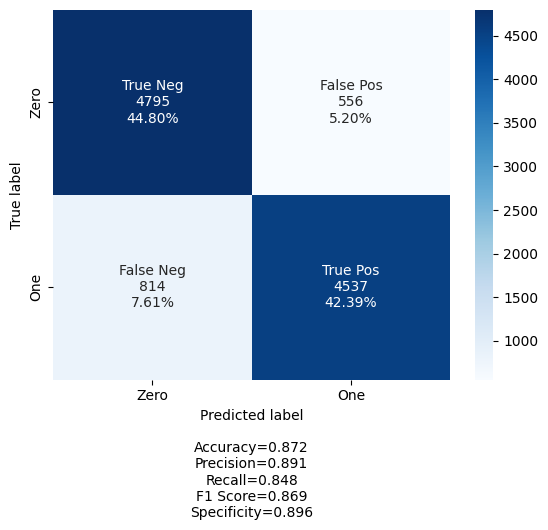

In [58]:
plot_result_matrix(LSTM_classifier, val_loader)

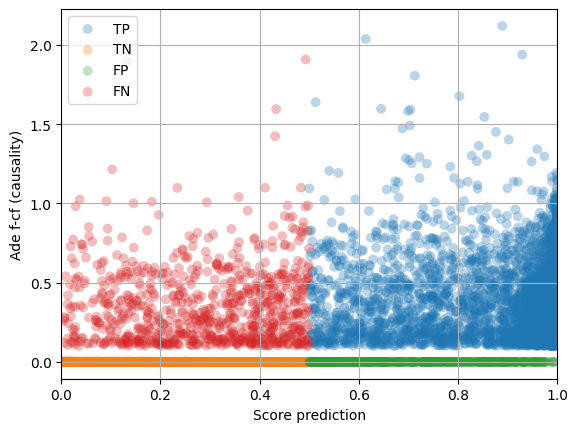

In [59]:
plot_graph_score_ade(LSTM_classifier, val_loader)

### Test on 'Indirectly causal'

In [60]:
nc_threshold_ = 0.001
c_threshold_ = 0.1
orca_causal_time_steps_max_ = 0
orca_causal_time_steps_min_ = 15

test_ic_loader = load_indirectly_causal_set(orca_causal_time_steps_max = orca_causal_time_steps_max_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)
test_inc_loader = load_indirectly_non_causal_set(orca_causal_time_steps_min = orca_causal_time_steps_min_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)

In [61]:
print('Accuracy on the indirectly causal scenarios :', round(predict_ic(LSTM_classifier, test_ic_loader)*100, 2), '%')





Accuracy on the indirectly causal scenarios : 52.63 %


In [62]:
print('Accuracy on the indirectly non-causal scenarios :', round(predict_ic(LSTM_classifier, test_inc_loader)*100, 2), '%')


Accuracy on the indirectly non-causal scenarios : 82.48 %


## 2. Causal approach

## 2.1 Causal-RN

### Train

In [75]:
Causal_RN_classifier = Causal_RN_Classifier(12*20*2, 32, 1)

In [76]:
num_epochs = 80

In [77]:
# First, we need to define a loss function and an optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(Causal_RN_classifier.parameters(), lr=0.01)
loss_epoch = []

# Then, we can define the training loop
for epoch in range(num_epochs):
    # Loop over the training data in batches
    for inputs, inputs_agents, labels, _, _ in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = Causal_RN_classifier(inputs, inputs_agents)
        loss = criterion(outputs, labels.unsqueeze(1))

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        loss_epoch += [loss.detach()]
    if epoch % 10 == 0:
        _, _, acc, f1, _, _, _ = predict(Causal_RN_classifier, val_loader)
        print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', Accuracy = ', acc, ', F1-score = ', f1)
        

Epoch n° 0 : loss =  0.69320947 , Accuracy =  0.5240142029527192 , F1-score =  0.3555161943319838
Epoch n° 10 : loss =  0.5384073 , Accuracy =  0.7920949355260699 , F1-score =  0.7976720923888334
Epoch n° 20 : loss =  0.46723965 , Accuracy =  0.813492805083162 , F1-score =  0.8105183216252135
Epoch n° 30 : loss =  0.42775297 , Accuracy =  0.8341431508129321 , F1-score =  0.834127651621344
Epoch n° 40 : loss =  0.40182325 , Accuracy =  0.8337693888992712 , F1-score =  0.8315819369497301


### Test

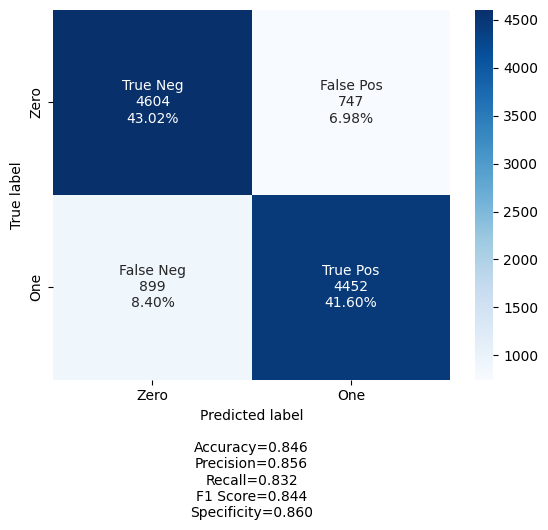

In [70]:
plot_result_matrix(Causal_RN_classifier, val_loader)

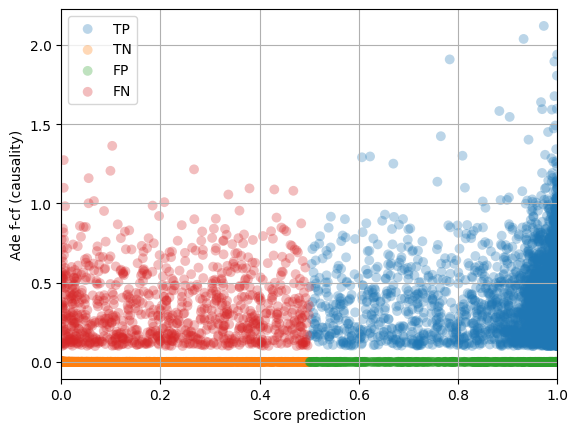

In [71]:
plot_graph_score_ade(Causal_RN_classifier, val_loader)

### Test on 'Indirectly causal'

In [72]:
nc_threshold_ = 0.001
c_threshold_ = 0.1
orca_causal_time_steps_max_ = 0
orca_causal_time_steps_min_ = 15

test_ic_loader = load_indirectly_causal_set(orca_causal_time_steps_max = orca_causal_time_steps_max_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)
test_inc_loader = load_indirectly_non_causal_set(orca_causal_time_steps_min = orca_causal_time_steps_min_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)

In [73]:
print('Accuracy on the indirectly causal scenarios :', round(predict_ic(Causal_RN_classifier, test_ic_loader)*100, 2), '%')





Accuracy on the indirectly causal scenarios : 54.52 %


In [74]:
print('Accuracy on the indirectly non-causal scenarios :', round(predict_ic(Causal_RN_classifier, test_inc_loader)*100, 2), '%')





Accuracy on the indirectly non-causal scenarios : 80.71 %


## 2.2 Causal-LSTM

### Train

In [82]:
print_every = 1

In [83]:
Causal_LSTM_classifier = Causal_LSTM_Classifier(12, 32, 32, 1)

In [84]:
training_step = 1

In [92]:
num_epochs = 10

In [94]:
# First, we need to define a loss function and an optimizer
mse_loss = nn.MSELoss()
bce_loss = nn.BCELoss()
optimizer = torch.optim.SGD(Causal_LSTM_classifier.parameters(), lr=0.001)
loss_epoch = []


# Then, we can define the training loop
for epoch in range(num_epochs):
    if epoch == 5:
        training_step = 2
        for g in optimizer.param_groups:
            g['lr'] = 0.001
    loss_epoch = []
    
    # Loop over the training data in batches
    for inputs, inputs_agents, labels, _, _ in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = Causal_LSTM_classifier(inputs, inputs_agents, training_step)
        if training_step == 1:
            loss = mse_loss(outputs, inputs_agents)
        if training_step == 2:
            loss = bce_loss(outputs, labels.unsqueeze(1))

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        loss_epoch += [loss.detach()]
    if epoch % print_every == 0:
        if training_step == 1:
            loss_val = ade_val(Causal_LSTM_classifier, val_loader, training_step_ = training_step, causal = True)
            print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', loss validation = ', loss_val)
        if training_step == 2:
            _, _, acc, f1, _, _, _ = predict(Causal_LSTM_classifier, val_loader)
            print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', Accuracy = ', acc, ', F1-score = ', f1)
        





Epoch n° 0 : loss =  0.34427786 , Accuracy =  0.8540459727153803 , F1-score =  0.8519150549867274
Epoch n° 1 : loss =  0.33943123 , Accuracy =  0.8532050084096431 , F1-score =  0.8513014671083767
Epoch n° 2 : loss =  0.3381451 , Accuracy =  0.854326294150626 , F1-score =  0.8519889869932593
Epoch n° 3 : loss =  0.33648324 , Accuracy =  0.8544197346290413 , F1-score =  0.8520698822635776
Epoch n° 4 : loss =  0.33516356 , Accuracy =  0.8548869370211175 , F1-score =  0.8531164286389862
Epoch n° 5 : loss =  0.3343114 , Accuracy =  0.8563819846757615 , F1-score =  0.8549863194641003
Epoch n° 6 : loss =  0.3332974 , Accuracy =  0.8560082227621005 , F1-score =  0.8541134147495977
Epoch n° 7 : loss =  0.33252093 , Accuracy =  0.856942627546253 , F1-score =  0.8552793269685226
Epoch n° 8 : loss =  0.33185527 , Accuracy =  0.8564754251541767 , F1-score =  0.8553944643193373
Epoch n° 9 : loss =  0.3317813 , Accuracy =  0.8585311156793123 , F1-score =  0.8577869622393388


### Test

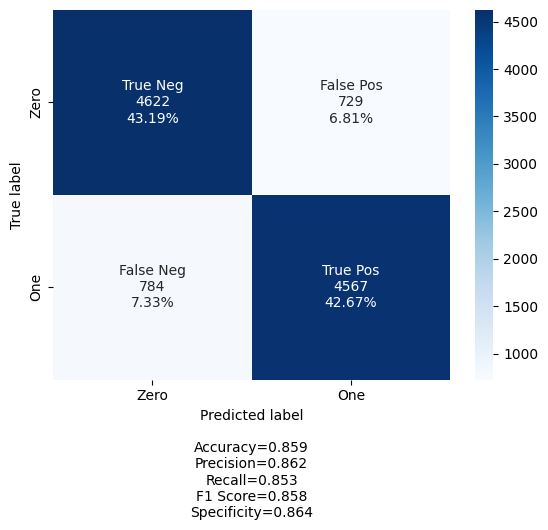

In [95]:
plot_result_matrix(Causal_LSTM_classifier, val_loader)

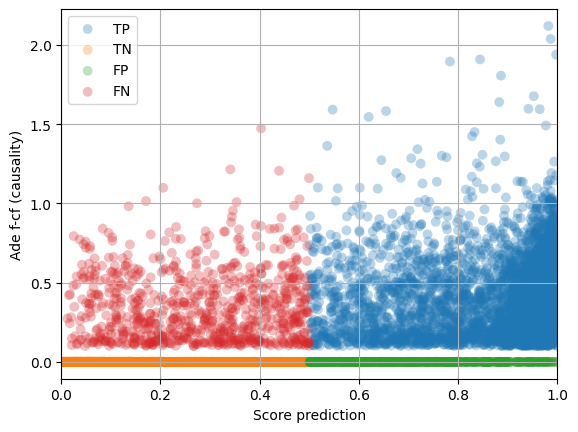

In [96]:
plot_graph_score_ade(Causal_LSTM_classifier, val_loader)

### Test on 'Indirectly causal'

In [97]:
nc_threshold_ = 0.001
c_threshold_ = 0.1
orca_causal_time_steps_max_ = 0
orca_causal_time_steps_min_ = 15

test_ic_loader = load_indirectly_causal_set(orca_causal_time_steps_max = orca_causal_time_steps_max_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)
test_inc_loader = load_indirectly_non_causal_set(orca_causal_time_steps_min = orca_causal_time_steps_min_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)

In [98]:
print('Accuracy on the indirectly causal scenarios :', round(predict_ic(Causal_LSTM_classifier, test_ic_loader)*100, 2), '%')





Accuracy on the indirectly causal scenarios : 53.49 %


In [99]:
print('Accuracy on the indirectly non-causal scenarios :', round(predict_ic(Causal_LSTM_classifier, test_inc_loader)*100, 2), '%')





Accuracy on the indirectly non-causal scenarios : 76.96 %


## 3. STGAT-like encoder

### Train

In [102]:
time_step_traj_ = 20
hidden_size_lstm = 32
mlp_hidden_ = 32
graph_lstm_hidden_size_ = 32
hidden_units_ = "16"
heads_ = "4,1"

STGAT_like_classifier = STGAT_like_Classifier(time_step_traj = 20, hidden_size = hidden_size_lstm, mlp_hidden = mlp_hidden_, graph_lstm_hidden_size = graph_lstm_hidden_size_, hidden_units = hidden_units_, heads = heads_)



In [122]:
training_step = 3

In [123]:
num_epochs = 25

In [124]:
# First, we need to define a loss function and an optimizer
loss_mse = nn.MSELoss()
loss_bce = nn.BCELoss()
optimizer = torch.optim.SGD(STGAT_like_classifier.parameters(), lr=0.005)


# Then, we can define the training loop
for epoch in range(num_epochs):
    
    loss_epoch = []
    
    if epoch == 10:
        training_step = 2
    if epoch == 15:
        training_step = 3
        for g in optimizer.param_groups:
            g['lr'] = 0.001
        
    # Loop over the training data in batches
    for inputs, inputs_agents, labels, _, _ in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        factual = inputs_agents[:, 0, :, :]
        # Forward pass
        outputs = STGAT_like_classifier(inputs, factual, training_step_ = training_step)
        
        if training_step == 1 or training_step == 2:
            target = factual[:, :, 1:20, :]
            loss = loss_mse(outputs, target)
        if training_step == 3:
            loss = loss_bce(outputs, labels.unsqueeze(1))

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()
        loss_epoch += [loss.detach()]
    if epoch % 1 == 0:
        if training_step != 3:
            loss_val = ade_val_stgat(STGAT_like_classifier, val_loader, training_step_ = training_step )
            print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', loss validation = ', loss_val)
        else:
            _, _, acc, f1, _, _, _ = predict_stgat(STGAT_like_classifier, val_loader)
            print('Epoch n°', epoch, ': loss = ',  np.mean(loss_epoch), ', Accuracy = ', acc, ', F1-score = ', f1)

Epoch n° 0 : loss =  0.3215853 , Accuracy =  0.865539151560456 , F1-score =  0.864564705882353
Epoch n° 1 : loss =  0.32214782 , Accuracy =  0.8150812932162212 , F1-score =  0.8283756829416357
Epoch n° 2 : loss =  0.32021335 , Accuracy =  0.8663801158661932 , F1-score =  0.8671991084695393
Epoch n° 3 : loss =  0.3184349 , Accuracy =  0.85582134180527 , F1-score =  0.8605260779173822
Epoch n° 4 : loss =  0.31760934 , Accuracy =  0.8672210801719304 , F1-score =  0.8658294778585591
Epoch n° 5 : loss =  0.3172198 , Accuracy =  0.8034946738927303 , F1-score =  0.8203638848552148
Epoch n° 6 : loss =  0.3157912 , Accuracy =  0.8604933657260325 , F1-score =  0.857033419515465
Epoch n° 7 : loss =  0.31573242 , Accuracy =  0.8482526630536348 , F1-score =  0.8539305630509085
Epoch n° 8 : loss =  0.31418735 , Accuracy =  0.8660063539525322 , F1-score =  0.8662562954672637
Epoch n° 9 : loss =  0.31240922 , Accuracy =  0.8661932349093627 , F1-score =  0.8662432280963945
Epoch n° 10 : loss =  0.01997

### Test

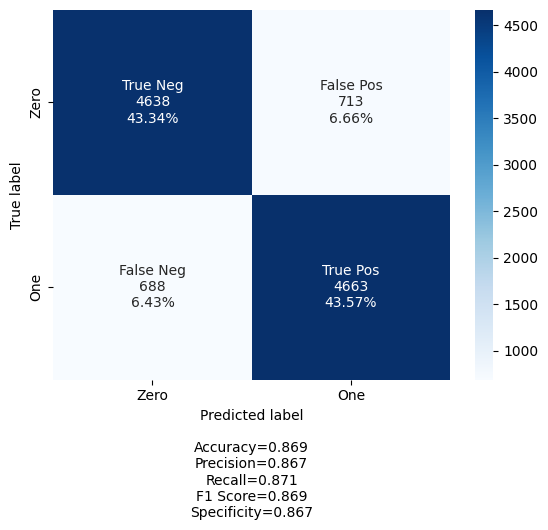

In [125]:
plot_result_matrix(STGAT_like_classifier, val_loader, stgat = True)

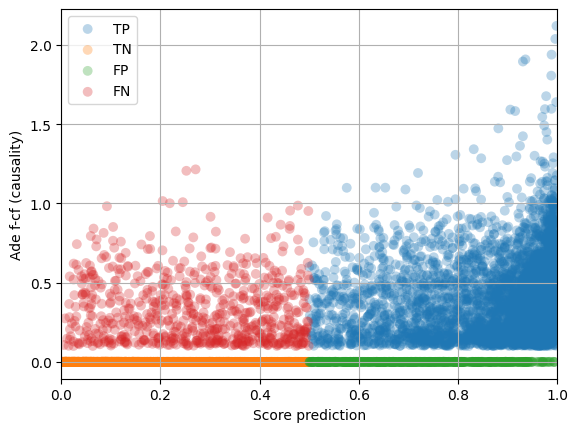

In [126]:
plot_graph_score_ade(STGAT_like_classifier, val_loader, stgat = True)

### Test on 'Indirectly causal'

In [127]:
nc_threshold_ = 0.001
c_threshold_ = 0.1
orca_causal_time_steps_max_ = 0
orca_causal_time_steps_min_ = 15

test_ic_loader = load_indirectly_causal_set(orca_causal_time_steps_max = orca_causal_time_steps_max_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)
test_inc_loader = load_indirectly_non_causal_set(orca_causal_time_steps_min = orca_causal_time_steps_min_, nc_threshold = nc_threshold_, c_threshold = c_threshold_)

In [128]:
print('Accuracy on the indirectly causal scenarios :', round(predict_ic_stgat(STGAT_like_classifier, test_ic_loader)*100, 2), '%')


Accuracy on the indirectly causal scenarios : 55.81 %


In [129]:
print('Accuracy on the indirectly non-causal scenarios :', round(predict_ic_stgat(STGAT_like_classifier, test_inc_loader)*100, 2), '%')


Accuracy on the indirectly non-causal scenarios : 78.52 %
